# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
!pip install bs4 wordcloud plotly

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []
date_pub = []
recommend = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    for para in parsed_content.find_all("time", {"itemprop": "datePublished"}):
        date_pub.append(para.get_text())
    
    tables = parsed_content.find_all('table')

    for table in tables:
        for row in table.find_all("td", {"class": "review-rating-header recommended"}):
            recommend.append(row.find_next("td").get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
print(len(reviews))
print('--------------')
print(len(date_pub))
print('----------------')
print(len(recommend))

3500
--------------
3500
----------------
3500


In [5]:
df = pd.DataFrame({'reviews': reviews, 'date published': date_pub, 'recommended': recommend})
df.head()

,reviews,date published,recommended
0,✅ Trip Verified | British Airways oversold my...,30th July 2024,no
1,✅ Trip Verified | I travelled London to Doha ...,30th July 2024,no
2,✅ Trip Verified | When dropping off my luggag...,28th July 2024,no
3,✅ Trip Verified | If you can’t fly First Class...,19th July 2024,no
4,Not Verified | Singapore to Heathrow. Busine...,16th July 2024,yes


In [6]:
# df = pd.DataFrame()
# df["reviews"] = reviews
# df.head()

In [7]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as plio
plio.templates
import plotly.graph_objs as go
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings
filterwarnings(action='ignore')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews         3500 non-null   object
 1   date published  3500 non-null   object
 2   recommended     3500 non-null   object
dtypes: object(3)
memory usage: 82.2+ KB


In [10]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

df['reviews'] = df['reviews'].str.lower()
df['reviews'] = df['reviews'].str.replace('trip verified', '')
df['reviews'] = df['reviews'].str.replace('not verified', '')
df['reviews'] = df['reviews'].str.replace('verified', '')
df['reviews'] = df['reviews'].str.replace(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", regex = True)
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dawil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df.head()

,reviews,date published,recommended
0,british airways oversold lhr lax flight booked...,30th July 2024,no
1,travelled london doha july 16th physically che...,30th July 2024,no
2,dropping luggage luggage drop toulouse airport...,28th July 2024,no
3,cant fly first class dont fly british airways ...,19th July 2024,no
4,singapore heathrow business class a380800 prem...,16th July 2024,yes


In [12]:
df


,reviews,date published,recommended
0,british airways oversold lhr lax flight booked...,30th July 2024,no
1,travelled london doha july 16th physically che...,30th July 2024,no
2,dropping luggage luggage drop toulouse airport...,28th July 2024,no
3,cant fly first class dont fly british airways ...,19th July 2024,no
4,singapore heathrow business class a380800 prem...,16th July 2024,yes
...,...,...,...
3495,ba038 pek lhr 280914 business class b747400 fi...,12th October 2014,no
3496,flew ba london dulles dc 1082014 unfortunately...,12th October 2014,yes
3497,b787 returned london toronto london flight ba ...,12th October 2014,no
3498,travelled hong kong british airways heathrow 7...,12th October 2014,yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews         3500 non-null   object
 1   date published  3500 non-null   object
 2   recommended     3500 non-null   object
dtypes: object(3)
memory usage: 82.2+ KB


In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dawil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
nltk.download(['punkt', 'wordnet', 'omw-1.4'])
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

regexp = RegexpTokenizer('\w+')

df['review_token'] = df['reviews'].apply(regexp.tokenize)
df['review_string'] = df['review_token'].apply(lambda x: ' '.join([item for item in x if len(item) > 1]))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dawil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dawil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dawil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,reviews,date published,recommended,review_token,review_string
0,british airways oversold lhr lax flight booked...,30th July 2024,no,"[british, airways, oversold, lhr, lax, flight,...",british airways oversold lhr lax flight booked...
1,travelled london doha july 16th physically che...,30th July 2024,no,"[travelled, london, doha, july, 16th, physical...",travelled london doha july 16th physically che...
2,dropping luggage luggage drop toulouse airport...,28th July 2024,no,"[dropping, luggage, luggage, drop, toulouse, a...",dropping luggage luggage drop toulouse airport...
3,cant fly first class dont fly british airways ...,19th July 2024,no,"[cant, fly, first, class, dont, fly, british, ...",cant fly first class dont fly british airways ...
4,singapore heathrow business class a380800 prem...,16th July 2024,yes,"[singapore, heathrow, business, class, a380800...",singapore heathrow business class a380800 prem...


In [16]:
all_words = ' '.join([word for word in df['review_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

lemmatizer = WordNetLemmatizer()

frdist = FreqDist(tokenized_words)

df['review_string_frdist'] = df['review_token'].apply(lambda x: ' '.join([item for item in x if frdist[item] > 5 and len(item) > 1]))

all_words_frdist = ' '.join([word for word in df['review_string_frdist']])
all_words_lem_frdist = [lemmatizer.lemmatize(w) for w in nltk.tokenize.word_tokenize(all_words_frdist)]
all_words_lem = ' '.join([word for word in all_words_lem_frdist])

df['review_string_lem'] = df['review_string_frdist'].apply(lemmatizer.lemmatize)

df.head()

,reviews,date published,recommended,review_token,review_string,review_string_frdist,review_string_lem
0,british airways oversold lhr lax flight booked...,30th July 2024,no,"[british, airways, oversold, lhr, lax, flight,...",british airways oversold lhr lax flight booked...,british airways oversold lhr lax flight booked...,british airways oversold lhr lax flight booked...
1,travelled london doha july 16th physically che...,30th July 2024,no,"[travelled, london, doha, july, 16th, physical...",travelled london doha july 16th physically che...,travelled london doha july 16th physically che...,travelled london doha july 16th physically che...
2,dropping luggage luggage drop toulouse airport...,28th July 2024,no,"[dropping, luggage, luggage, drop, toulouse, a...",dropping luggage luggage drop toulouse airport...,dropping luggage luggage drop toulouse airport...,dropping luggage luggage drop toulouse airport...
3,cant fly first class dont fly british airways ...,19th July 2024,no,"[cant, fly, first, class, dont, fly, british, ...",cant fly first class dont fly british airways ...,cant fly first class dont fly british airways ...,cant fly first class dont fly british airways ...
4,singapore heathrow business class a380800 prem...,16th July 2024,yes,"[singapore, heathrow, business, class, a380800...",singapore heathrow business class a380800 prem...,singapore heathrow business class premium econ...,singapore heathrow business class premium econ...


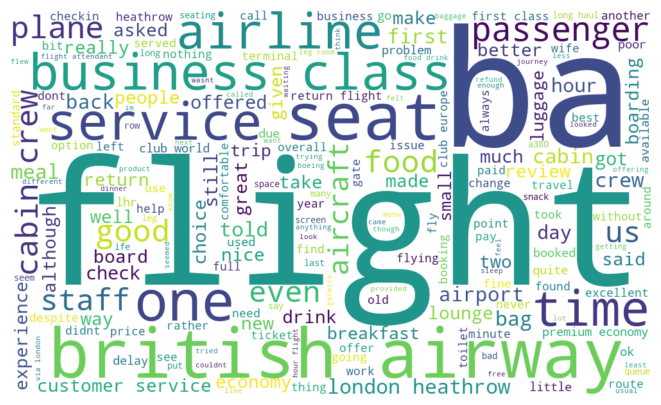

In [25]:
df_copy = df

# Create a WordCloud
all_reviews = ' '.join(df_copy['reviews'].astype(str))
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('data/wordcloud.png')

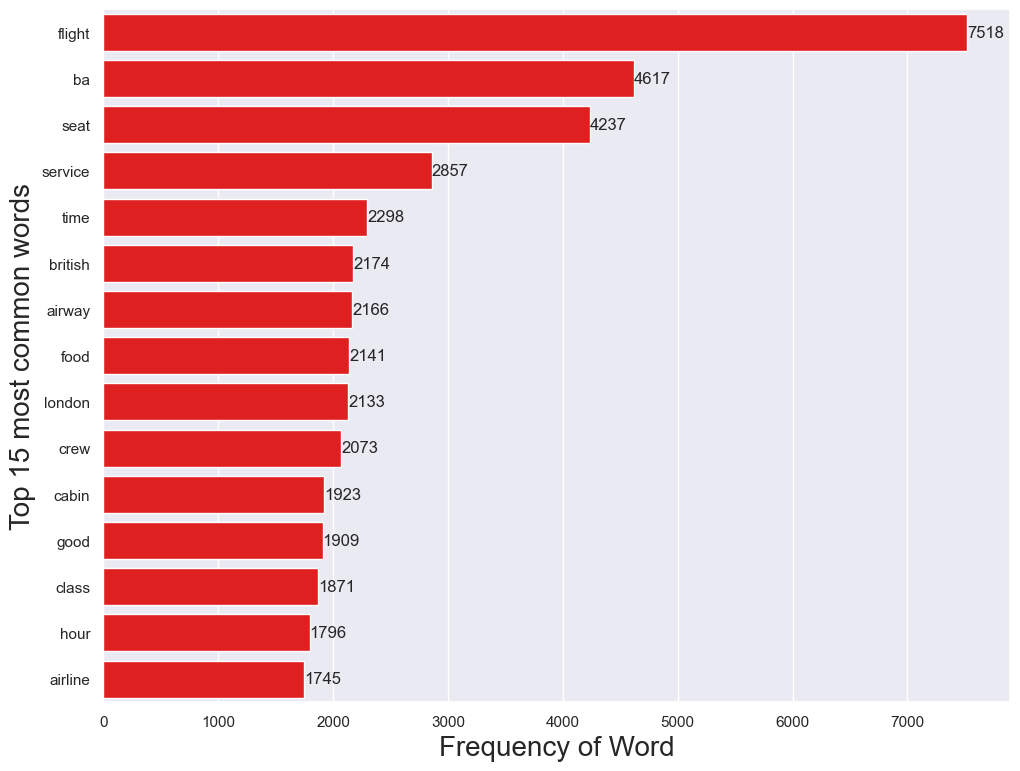

In [27]:
sns.set_theme(style='ticks')
sns.set(rc={'figure.figsize':(11.7,9)})

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

top_15 = fd.most_common(15)
frdist_series = pd.Series(dict(top_15))
ax = sns.barplot(y=frdist_series.index, x=frdist_series, color='red')
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Top 15 most common words', fontsize=20)
plt.xlabel('Frequency of Word', fontsize=20)
plt.savefig('data/15_most_common_word.jpg')

In [19]:
# # Performing Sentiment analysis
sia = SentimentIntensityAnalyzer()
# df_copy['Sentiment_Score'] = df_copy['reviews']['compound'])

df['polarity'] = df['review_string_lem'].apply(lambda x: sia.polarity_scores(x))

df = pd.concat(
    [df.drop('polarity', axis=1),
     df['polarity'].apply(pd.Series)
     ], axis=1
)

In [20]:
df.head()

,reviews,date published,recommended,review_token,review_string,review_string_frdist,review_string_lem,neg,neu,pos,compound
0,british airways oversold lhr lax flight booked...,30th July 2024,no,"[british, airways, oversold, lhr, lax, flight,...",british airways oversold lhr lax flight booked...,british airways oversold lhr lax flight booked...,british airways oversold lhr lax flight booked...,0.153,0.768,0.079,-0.9315
1,travelled london doha july 16th physically che...,30th July 2024,no,"[travelled, london, doha, july, 16th, physical...",travelled london doha july 16th physically che...,travelled london doha july 16th physically che...,travelled london doha july 16th physically che...,0.057,0.791,0.152,0.9743
2,dropping luggage luggage drop toulouse airport...,28th July 2024,no,"[dropping, luggage, luggage, drop, toulouse, a...",dropping luggage luggage drop toulouse airport...,dropping luggage luggage drop toulouse airport...,dropping luggage luggage drop toulouse airport...,0.111,0.746,0.143,0.5778
3,cant fly first class dont fly british airways ...,19th July 2024,no,"[cant, fly, first, class, dont, fly, british, ...",cant fly first class dont fly british airways ...,cant fly first class dont fly british airways ...,cant fly first class dont fly british airways ...,0.287,0.713,0.000,-0.9590
4,singapore heathrow business class a380800 prem...,16th July 2024,yes,"[singapore, heathrow, business, class, a380800...",singapore heathrow business class a380800 prem...,singapore heathrow business class premium econ...,singapore heathrow business class premium econ...,0.101,0.815,0.084,-0.1779


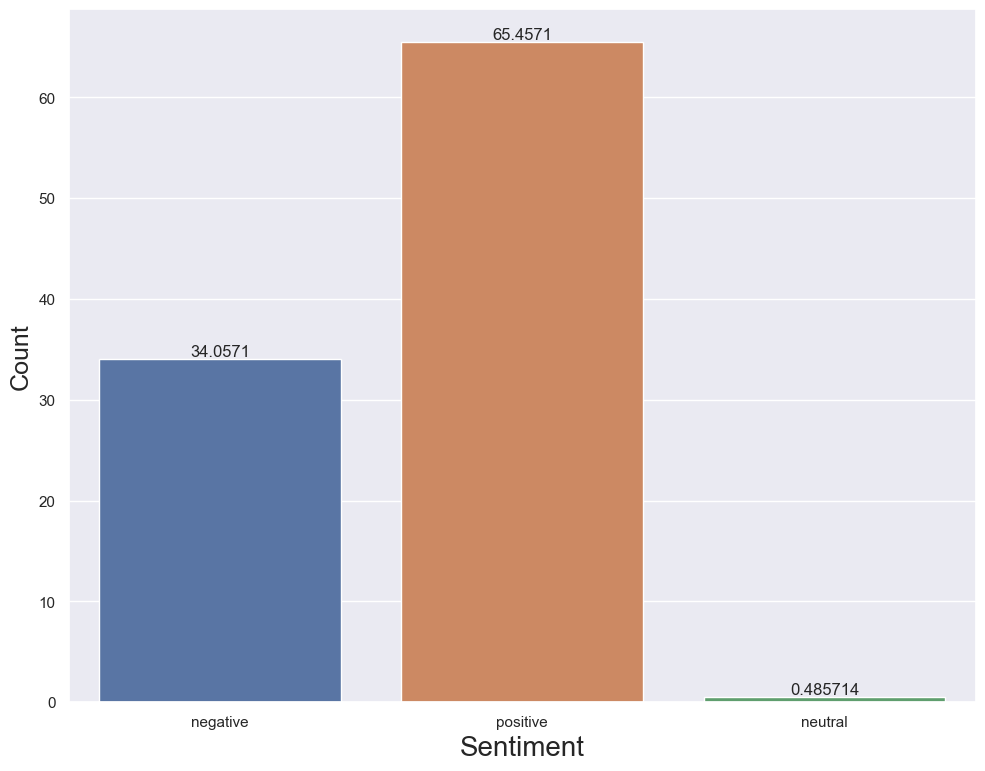

In [26]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x>0 else 'neutral' if x==0 else 'negative')
ax = sns.countplot(x='sentiment',
                   data=df,
                   hue='sentiment',
                   stat='percent'
                   )

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Sentiment', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.savefig('data/sentiment_count.jpg')

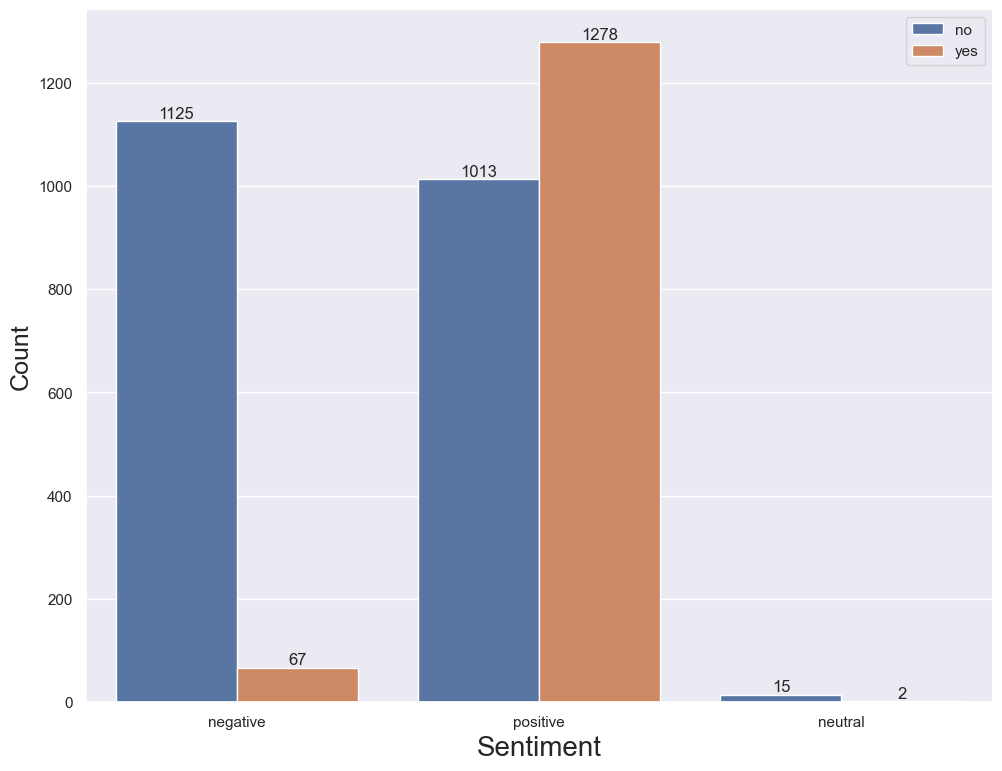

In [22]:
ax = sns.countplot(x='sentiment',
                   data=df,
                   hue=recommend
                   )

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Sentiment', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.savefig('data/rec_sentiment_count.jpg')

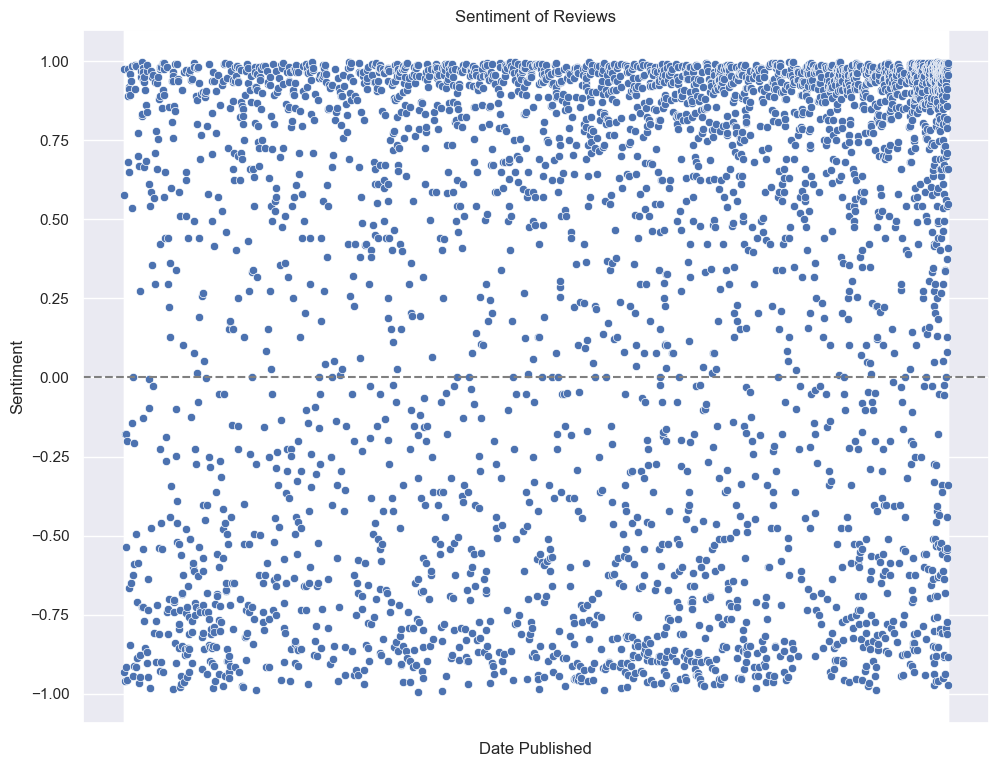

In [23]:
scatter = sns.scatterplot(x='date published', y='compound', data=df)

scatter.set(xticklabels=[])
scatter.set(title='Sentiment of Reviews')
scatter.set(xlabel='Date Published')
scatter.set(ylabel='Sentiment')
scatter.tick_params(bottom=False)

scatter.axhline(0, ls='--', c='grey')
plt.savefig('data/sentiment_OT.jpg')

<Axes: xlabel='sentiment', ylabel='compound'>

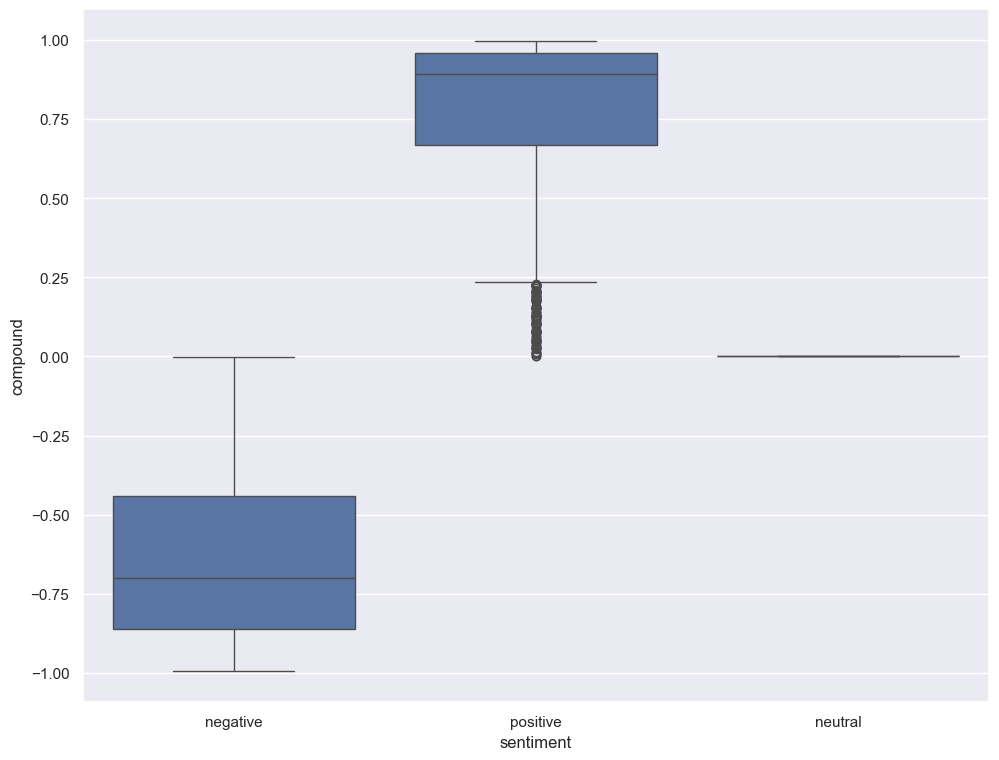

In [24]:
sns.boxplot(y='compound',
            x='sentiment',
            data=df)